<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT

## Title : Exe26 - Clusters of Grain

#### Name: Phua Yan Han

#### IC Number: 050824070059

#### Date :31/7/23

#### Introduction : 



#### Conclusion :






# How many clusters of grain?

This exercise is taken and modified from https://github.com/benjaminwilson/python-clustering-exercises

This is a class to choose a good number of clusters for a dataset using the k-means inertia graph.  You are given a dataset of the measurements of samples of grain.  What's a good number of clusters in this case?

This dataset was obtained from the [UCI](https://archive.ics.uci.edu/ml/datasets/seeds).


**Step 1:** Load the dataset _(written for you)_.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
seeds_df = pd.read_csv('../Data files/seeds.csv')
variety = seeds_df['grain_variety']
# forget about the grain variety for the moment - we'll use this later
del seeds_df['grain_variety']

**Step 2:** Display the DataFrame to inspect the data.  Notice that there are 7 columns - so each grain sample (row) is a point in 7D space!  Scatter plots can't help us here.

In [2]:
seeds_df

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


**Step 3:** Extract the measurements from the DataFrame using its `.values` attribute:

In [3]:
measurements=seeds_df.values


**Step 4:**  _(Written for you)_. Measure the quality of clusterings with different numbers of clusters using the
inertia.  For each of the given values of `k`, perform the following steps:

  - Create a `KMeans` instance called `model` with `k` clusters.
  - Fit the model to the grain data `samples`.
  - Append the value of the `inertia_` attribute of `model` to the list `inertias`.

In [4]:
inertias = []

# Define the range of values of k (number of clusters) to try
k_values = range(1, 11)  # Trying k from 1 to 10

# Loop through different values of k
for k in k_values:
    # Create a KMeans instance with k clusters
    model = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the grain data samples
    model.fit(measurements)
    
    # Append the value of the inertia_ attribute of the model to the list inertias
    inertias.append(model.inertia_)

C:\Users\Asus\anaconda3\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Asus\anaconda3\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

**Step 5:**  Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

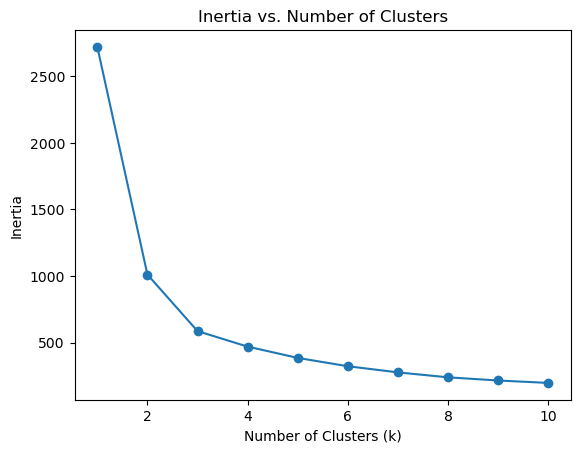

In [5]:
# Plotting the results to visualize the inertia values for different k values
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.show()

**Excellent work!** You can see from the graph the "best" number of clusters. Use this value for the next steps.

**Step 6:** Create a `KMeans` model called `model` with the best value from the above steps.

In [6]:
best_k = k_values[inertias.index(min(inertias))]

# Create the KMeans model with the best value of k
model = KMeans(n_clusters=best_k, random_state=42)

# Fit the model to the grain data samples
model.fit(measurements)

C:\Users\Asus\anaconda3\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

**Step 7:** Use the .fit_predict() method of model to fit it to samples and derive the cluster labels.

Calling .fit_predict() is the same as calling .fit() and then calling .predict().

In [7]:
cluster_labels = model.fit_predict(measurements)
cluster_labels

C:\Users\Asus\anaconda3\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([5, 5, 0, 9, 5, 0, 0, 0, 5, 5, 3, 9, 0, 0, 0, 0, 2, 5, 5, 2, 0, 0,
       5, 9, 5, 5, 9, 9, 0, 0, 9, 0, 0, 9, 5, 5, 5, 3, 0, 8, 9, 9, 9, 3,
       0, 9, 5, 0, 0, 5, 0, 3, 0, 0, 5, 5, 0, 5, 5, 9, 4, 4, 4, 2, 9, 9,
       5, 0, 5, 4, 3, 3, 3, 1, 3, 3, 3, 6, 6, 3, 3, 6, 6, 1, 1, 1, 1, 1,
       6, 6, 1, 1, 1, 6, 6, 3, 1, 1, 1, 1, 3, 1, 6, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 6, 6, 1, 6, 1, 1, 1, 6, 1, 3, 1, 3, 6, 6, 1, 1, 3, 1, 1,
       3, 3, 3, 0, 3, 5, 5, 3, 2, 8, 2, 2, 4, 7, 4, 2, 4, 7, 2, 8, 2, 4,
       4, 7, 4, 2, 4, 7, 4, 4, 2, 2, 7, 9, 2, 4, 4, 4, 7, 7, 4, 7, 7, 7,
       7, 7, 7, 9, 7, 2, 2, 7, 2, 4, 2, 4, 7, 7, 7, 4, 4, 7, 4, 2, 2, 2,
       4, 9, 2, 9, 4, 8, 4, 4, 4, 8, 4, 2])

**Step 8:** Create a DataFrame `df` with two columns named `'labels'` and `'varieties'`, using `labels` and `varieties`, respectively, for the column values.

In [9]:
df = pd.DataFrame({'labels': cluster_labels, 'varieties':variety })
df

,labels,varieties
0,5,Kama wheat
1,5,Kama wheat
2,0,Kama wheat
3,9,Kama wheat
4,5,Kama wheat
...,...,...
205,4,Canadian wheat
206,4,Canadian wheat
207,8,Canadian wheat
208,4,Canadian wheat


**Step 9:** Use the `pd.crosstab()` function on `df['labels']` and `df['varieties']` to count the number of times each grain variety coincides with each cluster label. Assign the result to `ct`.

In [12]:
ct = pd.crosstab(df['labels'], df['varieties'])

**Step 10:** Display `ct` by evaluating it - and inspect your cross-tabulation!  You'll see that your clustering is pretty good.

In [13]:
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,0,23,1
1,0,0,33
2,19,3,0
3,0,4,19
4,24,4,0
5,0,21,2
6,0,0,15
7,19,0,0
8,4,1,0


Now you are done. If you wish, you can also try to plot the clusters to visualize it.
